I will try to plot a filed that is smoothed in two ways: in one we set negative EVI to zero to show why we are doing it, and in another one we do not

In [3]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

In [4]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_plot_core as rcp

start_time = time.time()

In [5]:
data_dir = "/Users/hn/Documents/01_research_data/" + \
           "remote_sensing/01_NDVI_TS/70_Cloud/00_Eastern_WA_withYear/2Years/"

param_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/parameters/"

In [6]:
SF_year = 2017

In [7]:
# f_name = "Eastern_WA_" + str(SF_year) + "_70cloud_selectors.csv"
# a_df = pd.read_csv(data_dir + f_name, low_memory=False)

# desired_ID = ["100011_WSDA_SF_2017", "101599_WSDA_SF_2017"]
# a_df = a_df[a_df.ID.isin(desired_ID)]
# a_df['SF_year'] = SF_year
# a_df.ID.unique()

In [8]:
write_dir = "/Users/hn/Documents/01_research_data/remote_sensing/data_for_plots_in_paper/"
# a_df.to_csv(write_dir + "EVI_NDVI_supress.csv", index = False)

In [9]:
a_df = pd.read_csv(write_dir + "EVI_NDVI_supress.csv", low_memory=False)

a_df['human_system_start_time'] = pd.to_datetime(a_df['image_year'] * 1000 + \
                                                 a_df['doy'], format='%Y%j')
a_df.ID.unique()

array(['101599_WSDA_SF_2017', '100011_WSDA_SF_2017'], dtype=object)

In [10]:
NDVIs = a_df[a_df["NDVI"].notna()].copy()
EVIs = a_df[a_df["EVI"].notna()].copy()

corn_NDVI = NDVIs[NDVIs.ID == "100011_WSDA_SF_2017"].copy()
corn_EVI = EVIs[EVIs.ID == "100011_WSDA_SF_2017"].copy()

bean_NDVI = NDVIs[NDVIs.ID == "101599_WSDA_SF_2017"].copy()
bean_EVI = EVIs[EVIs.ID == "101599_WSDA_SF_2017"].copy()

corn_NDVI.sort_values(by=['image_year', 'doy'], inplace=True)
corn_EVI.sort_values(by=['image_year', 'doy'], inplace=True)
bean_NDVI.sort_values(by=['image_year', 'doy'], inplace=True)
bean_EVI.sort_values(by=['image_year', 'doy'], inplace=True)

corn_NDVI.reset_index(drop=True, inplace=True)
corn_EVI.reset_index(drop=True, inplace=True)
bean_NDVI.reset_index(drop=True, inplace=True)
bean_EVI.reset_index(drop=True, inplace=True)

corn_NDVI['Date'] = pd.to_datetime(corn_NDVI.human_system_start_time.values).values
corn_EVI['Date'] = pd.to_datetime(corn_EVI.human_system_start_time.values).values
bean_NDVI['Date'] = pd.to_datetime(bean_NDVI.human_system_start_time.values).values
bean_EVI['Date'] = pd.to_datetime(bean_EVI.human_system_start_time.values).values

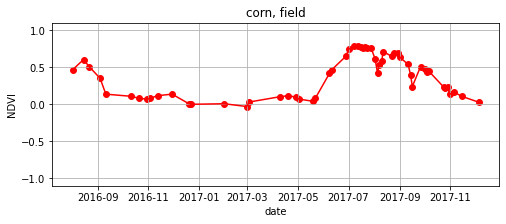

In [11]:
fig, ax = plt.subplots(figsize=(8,3));
plot_title = corn_NDVI.CropTyp.unique()[0]

ax.plot(corn_NDVI['Date'], corn_NDVI['NDVI'], c='r')
ax.scatter(corn_NDVI['Date'], corn_NDVI['NDVI'], marker='o', s=35, c='r')
ax.set_ylim([-1.1, 1.1])

ax.set_title(plot_title);
ax.set(xlabel='date', ylabel='NDVI')
# ax.legend(loc="best");
ax.grid(True)

# Filter only one year of data

In [12]:
corn_NDVI = corn_NDVI[corn_NDVI.image_year == 2017]
corn_EVI = corn_EVI[corn_EVI.image_year == 2017]

bean_NDVI = bean_NDVI[bean_NDVI.image_year == 2017]
bean_EVI = bean_EVI[bean_EVI.image_year == 2017]


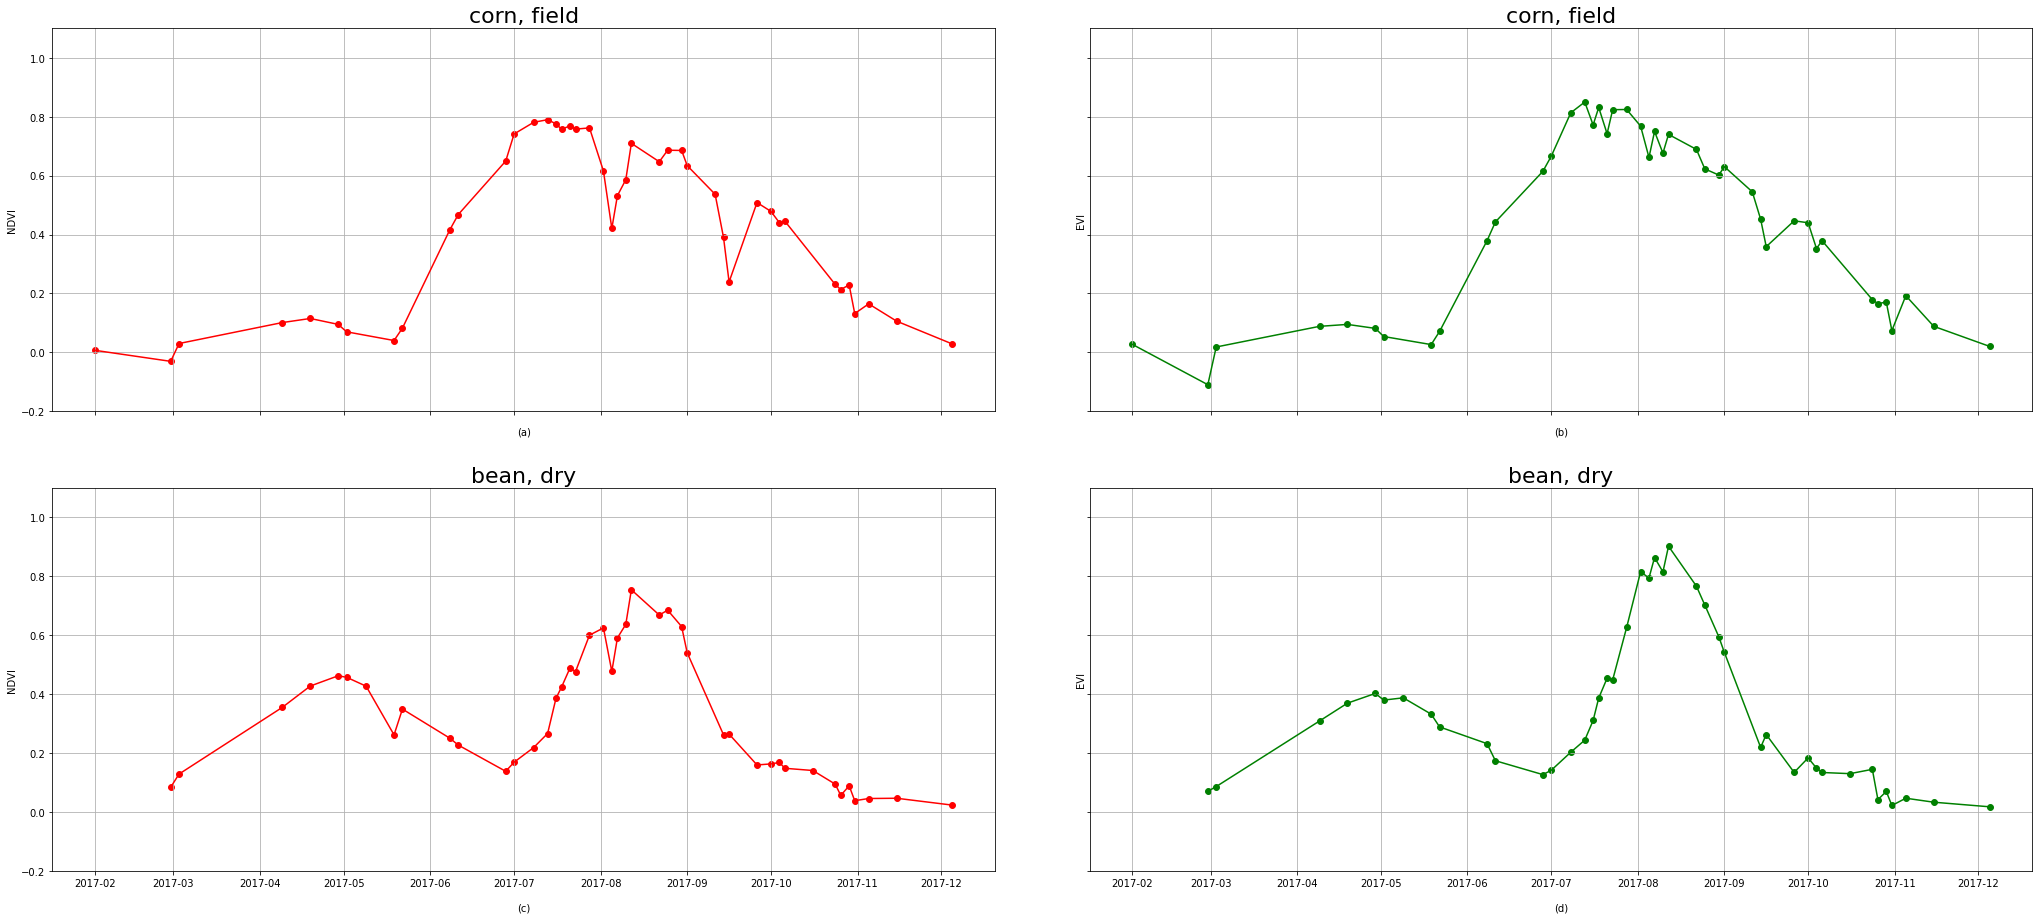

In [13]:
y_limits = [-0.2, 1.1]
fig, axs = plt.subplots(2, 2, figsize=(20, 12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.2, 'wspace': .1});

(ax1, ax2), (ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True);
# plt.rcParams.update({'font.size': 22}) # changes titles font size

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
          'axes.labelsize': 22, # changes date (a), (b), (c), (d) on x-axis, EVI, NDVI on y axis. 
                               # The smaller this number the bigger the labels!!
          'axes.titlesize': 22, # changes titles, bean dry for example. 
                               # This line and the one above are connected, problematic
          'xtick.labelsize':15,
          'ytick.labelsize':15
         }
pylab.rcParams.update(params)

# plt.subplots_adjust(left=0, bottom=0, right=1.1, top=0.9, wspace=0, hspace=0)
# plt.subplots_adjust(wspace=.1, hspace = 0.5)
plt.subplots_adjust(right=1.5, top=1.1)

ax1.plot(corn_NDVI['Date'], corn_NDVI['NDVI'], c='r')
ax1.scatter(corn_NDVI['Date'], corn_NDVI['NDVI'], marker='o', s=35, c='r')
ax1.set_ylim(y_limits);
plot_title = corn_NDVI.CropTyp.unique()[0]
ax1.set_title(plot_title);
ax1.set(xlabel='(a)', ylabel='NDVI');
ax1.xaxis.labelpad = 15
# ax1.legend(loc="best");

ax2.plot(corn_EVI['Date'], corn_EVI['EVI'], c='g')
ax2.scatter(corn_EVI['Date'], corn_EVI['EVI'], marker='o', s=35, c='g')
ax2.set_ylim(y_limits)
plot_title = corn_EVI.CropTyp.unique()[0]
ax2.set_title(plot_title);
# ax2.set_ylabel('EVI', fontsize=40)
ax2.set(xlabel='(b)', ylabel='EVI'); # date\n (d)
ax2.xaxis.labelpad = 15

ax3.plot(bean_NDVI['Date'], bean_NDVI['NDVI'], c='r')
ax3.scatter(bean_NDVI['Date'], bean_NDVI['NDVI'], marker='o', s=35, c='r')
ax3.set_ylim(y_limits)
plot_title = bean_NDVI.CropTyp.unique()[0]
ax3.set_title(plot_title);
ax3.set(xlabel='(c)', ylabel='NDVI'); # date \n (c)
ax3.xaxis.labelpad = 15

ax4.plot(bean_EVI['Date'], bean_EVI['EVI'], c='g')
ax4.scatter(bean_EVI['Date'], bean_EVI['EVI'], marker='o', s=35, c='g')
ax4.set_ylim(y_limits)
plot_title = bean_EVI.CropTyp.unique()[0]
ax4.set_title(plot_title);
ax4.set(xlabel = '(d)', ylabel='EVI'); # date\n (d)
ax4.xaxis.labelpad = 15

plot_dir = "/Users/hn/Documents/00_GitHub/Ag_papers/remote_sensing/plots_for_paper/"
os.makedirs(plot_dir, exist_ok=True)
fig_name = plot_dir + 'Fig2_EVI_vs_NDVI_bigFontA18right15.pdf'
plt.savefig(fname = fig_name, dpi = 400, bbox_inches = 'tight')